In [ ]:
import pandas as pd

train = pd.read_csv("/content/train.csv")

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test = pd.read_csv("/content/test.csv")

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

In [ ]:
%matplotlib inline

import seaborn as sns

import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### datetime

In [ ]:
train["datetime"] = pd.to_datetime(train["datetime"])

In [ ]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

In [ ]:
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]]

,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0
...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,2012,12,19,22,0,0


In [ ]:
test["datetime"] = pd.to_datetime(test["datetime"])

In [ ]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

In [ ]:
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]]

,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-20 00:00:00,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011,1,20,2,0,0
3,2011-01-20 03:00:00,2011,1,20,3,0,0
4,2011-01-20 04:00:00,2011,1,20,4,0,0
...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,2012,12,31,19,0,0
6489,2012-12-31 20:00:00,2012,12,31,20,0,0
6490,2012-12-31 21:00:00,2012,12,31,21,0,0
6491,2012-12-31 22:00:00,2012,12,31,22,0,0


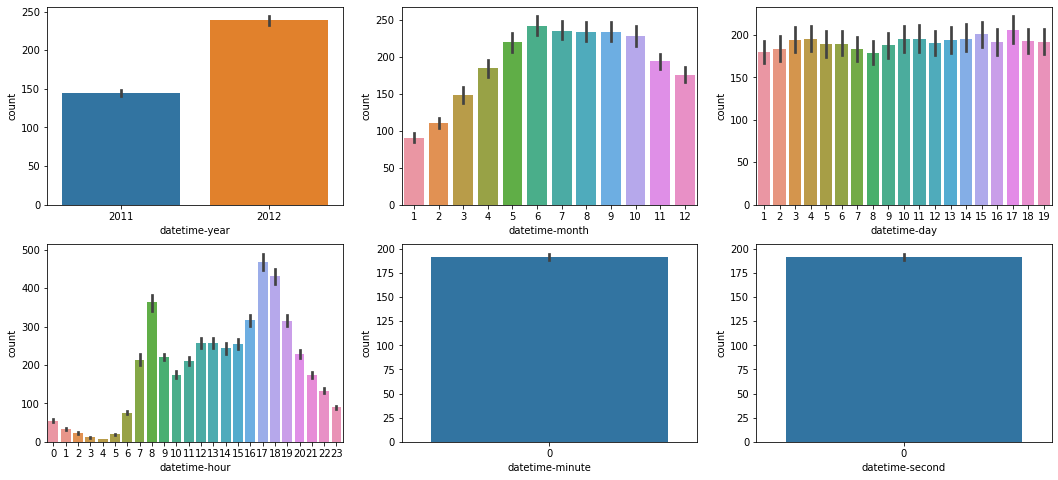

In [ ]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

### weather

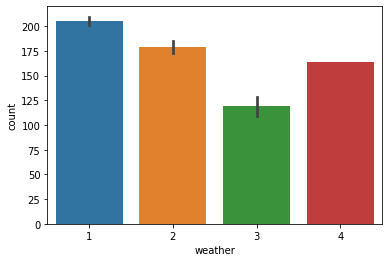

In [ ]:
sns.barplot(data=train, x="weather", y="count")

### windspeed

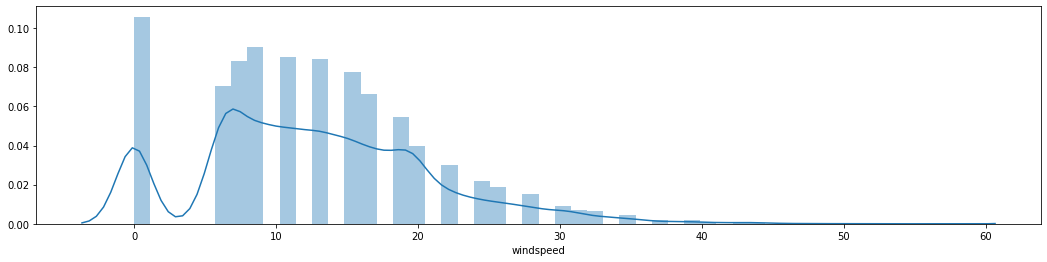

In [ ]:
plt.figure(figsize = (18,4))

sns.distplot(train["windspeed"])

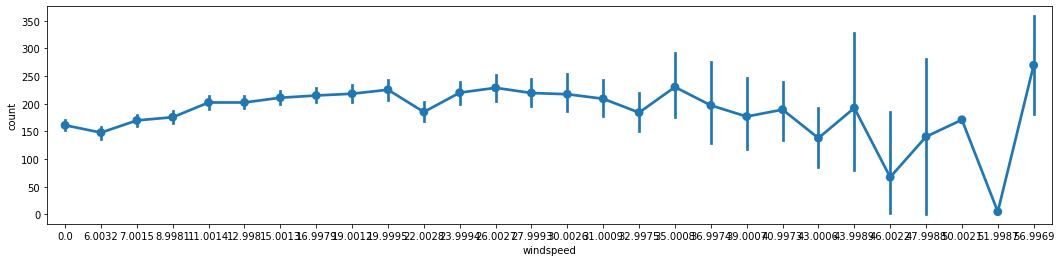

In [ ]:
plt.figure(figsize = (18,4))

sns.pointplot(data = train, x="windspeed", y="count")

[0.    0.003 0.998 0.001 1.    0.998 0.001 0.998 0.001 0.003 0.003 0.999
 0.999 0.003 0.002 0.998 0.997 0.001 0.001 0.001 0.999 0.997 0.999 0.002
 0.002 0.001 0.997 0.999]


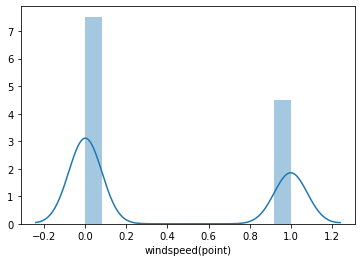

In [ ]:
train["windspeed(point)"] = train["windspeed"] - train["windspeed"].astype('int')

print(train["windspeed(point)"].unique().round(3))

sns.distplot(train["windspeed(point)"])

### temp

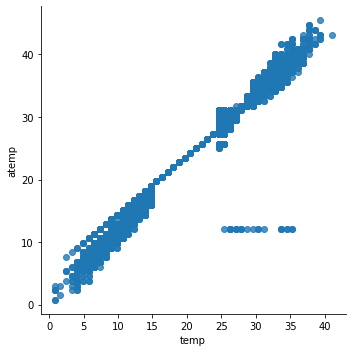

In [ ]:
sns.lmplot(data=train, x="temp", y="atemp", fit_reg=False)

In [ ]:
train["temp"].unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [ ]:
train["atemp"].unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

In [ ]:
train["temp(int)"] = train["temp"].round()
train["atemp(int)"] = train["atemp"].round()

In [ ]:
plt.figure(figsize = (12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

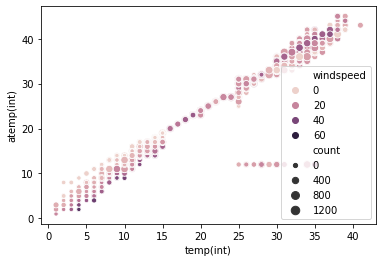

In [ ]:
sns.scatterplot(data=train, x="temp(int)", y="atemp(int)", hue="windspeed", size="count")

In [ ]:
train["temp(difference)"] = train["temp(int)"] - train["atemp(int)"]

train[["temp(int)", "atemp(int)", "temp(difference)"]].head()

,temp(int),atemp(int),temp(difference)
0,10.0,14.0,-4.0
1,9.0,14.0,-5.0
2,9.0,14.0,-5.0
3,10.0,14.0,-4.0
4,10.0,14.0,-4.0


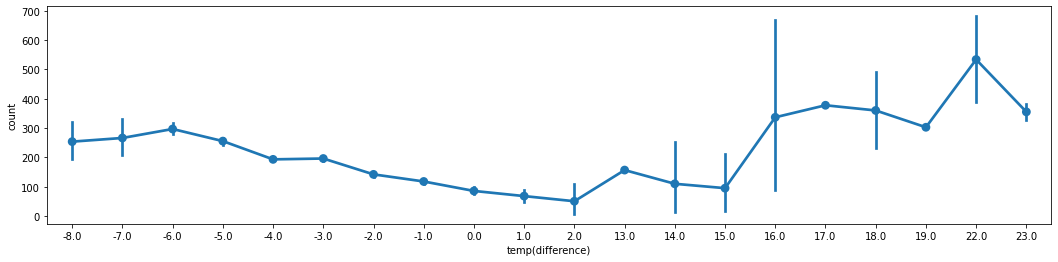

In [ ]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="temp(difference)", y="count")

In [ ]:
train["temp(difference)"].value_counts()

-4.0     5106
-3.0     2097
-2.0     1415
-5.0     1049
-1.0      509
-6.0      405
 0.0      219
 1.0       32
-7.0       21
 22.0       5
-8.0        5
 14.0       5
 2.0        4
 16.0       3
 15.0       3
 18.0       3
 23.0       2
 17.0       1
 13.0       1
 19.0       1
Name: temp(difference), dtype: int64

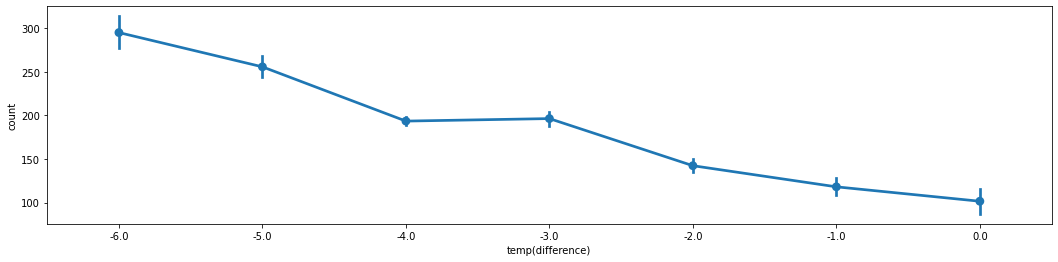

In [ ]:
train.loc[train["temp(difference)"] < -6, "temp(difference)"] = -6
train.loc[train["temp(difference)"] > 0, "temp(difference)"] = 0

plt.figure(figsize = (18,4))
sns.pointplot(data=train, x="temp(difference)", y="count")

### datetime-dayofweek

In [ ]:
train["datetime-dayofweek"] = train["datetime"].dt.day_name()

In [ ]:
train[["datetime", "datetime-dayofweek"]].head()

,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,Saturday
1,2011-01-01 01:00:00,Saturday
2,2011-01-01 02:00:00,Saturday
3,2011-01-01 03:00:00,Saturday
4,2011-01-01 04:00:00,Saturday


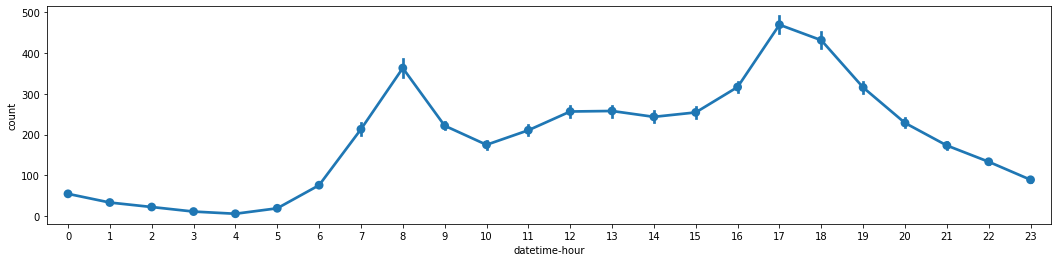

In [ ]:
plt.figure(figsize = (18,4))

sns.pointplot(data=train, x= "datetime-hour", y="count")

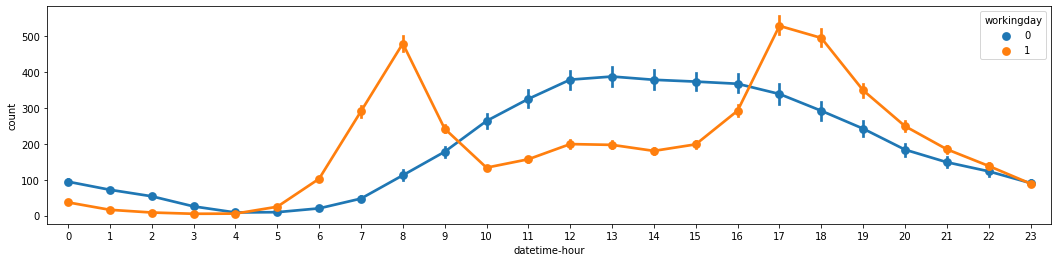

In [ ]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday")

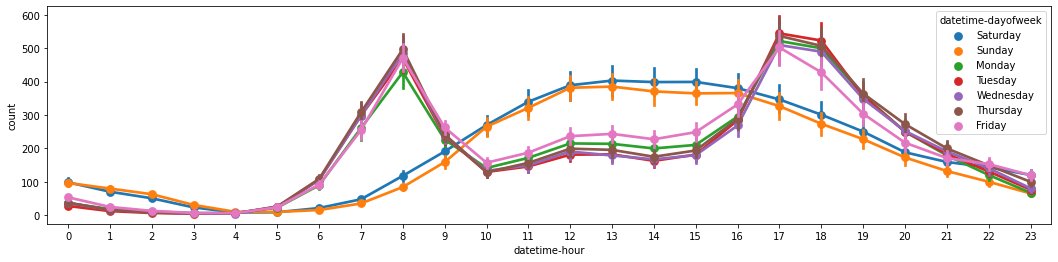

In [ ]:
plt.figure(figsize=(18,4))
dayofweek_ouder = ["Monday", "Tuseday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek")

### Casual Registered

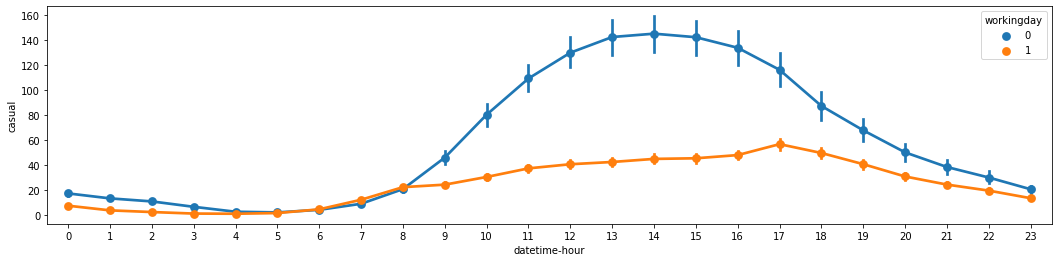

In [ ]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="datetime-hour", y="casual", hue="workingday")

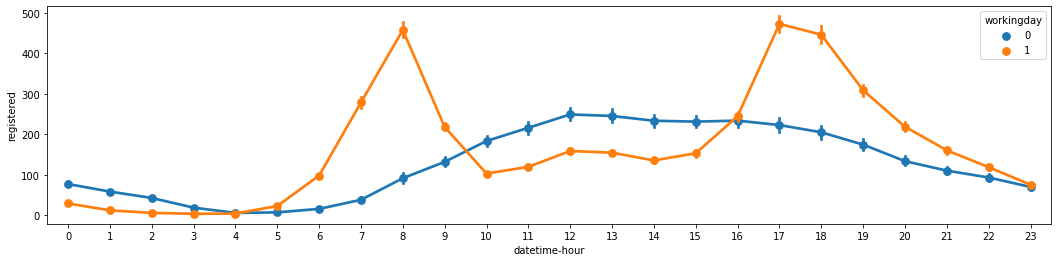

In [ ]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="datetime-hour", y="registered", hue="workingday")

## Train

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
feature_names = ["season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]

feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-month',
 'datetime-day',
 'datetime-hour',
 'datetime-minute',
 'datetime-second']

In [ ]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 14)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4,0,0


In [ ]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 14)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0


## Predict

In [ ]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction_list = model.predict(X_test)

print(prediction_list.shape)
prediction_list

(6493,)


array([ 15,   4,   4, ..., 127,  88,  88])

## Submit

In [ ]:
submit = pd.read_csv("/content/sampleSubmission.csv")

submit["count"] = prediction_list

print(submit.shape)
submit.head()

submit.to_csv("Submission.csv", index =False)

(6493, 2)
